In [1]:
#Importing all the required library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Reading the Train Dataset
df_train=pd.read_excel('C:/Users/User/Documents/Data Trained/Data-Science-ML-Capstone-Projects-master/Flight_Ticket_Participant_Datasets-20190305T100527Z-001/Flight_Ticket_Participant_Datasets/Data_Train.xlsx')
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df_train.shape

(10683, 11)

In [5]:
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [6]:
df_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [7]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
#Reading the Test Dataset
df_test=pd.read_excel('C:/Users/User/Documents/Data Trained/Data-Science-ML-Capstone-Projects-master/Flight_Ticket_Participant_Datasets-20190305T100527Z-001/Flight_Ticket_Participant_Datasets/Test_set.xlsx')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [9]:
df_test.shape

(2671, 10)

In [10]:
df_test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [11]:
df_train['Data']='Train'
df_test['Data']='Test'
df_test['Price']=0


In [12]:
df=pd.concat([df_train,df_test])
df.head()

,Additional_Info,Airline,Arrival_Time,Data,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops
0,No info,IndiGo,01:10 22 Mar,Train,24/03/2019,22:20,New Delhi,2h 50m,3897,BLR → DEL,Banglore,non-stop
1,No info,Air India,13:15,Train,1/05/2019,05:50,Banglore,7h 25m,7662,CCU → IXR → BBI → BLR,Kolkata,2 stops
2,No info,Jet Airways,04:25 10 Jun,Train,9/06/2019,09:25,Cochin,19h,13882,DEL → LKO → BOM → COK,Delhi,2 stops
3,No info,IndiGo,23:30,Train,12/05/2019,18:05,Banglore,5h 25m,6218,CCU → NAG → BLR,Kolkata,1 stop
4,No info,IndiGo,21:35,Train,01/03/2019,16:50,New Delhi,4h 45m,13302,BLR → NAG → DEL,Banglore,1 stop


In [13]:
df.shape

(13354, 12)

In [14]:
df.columns

Index(['Additional_Info', 'Airline', 'Arrival_Time', 'Data', 'Date_of_Journey',
       'Dep_Time', 'Destination', 'Duration', 'Price', 'Route', 'Source',
       'Total_Stops'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 12 columns):
Additional_Info    13354 non-null object
Airline            13354 non-null object
Arrival_Time       13354 non-null object
Data               13354 non-null object
Date_of_Journey    13354 non-null object
Dep_Time           13354 non-null object
Destination        13354 non-null object
Duration           13354 non-null object
Price              13354 non-null int64
Route              13353 non-null object
Source             13354 non-null object
Total_Stops        13353 non-null object
dtypes: int64(1), object(11)
memory usage: 1.3+ MB


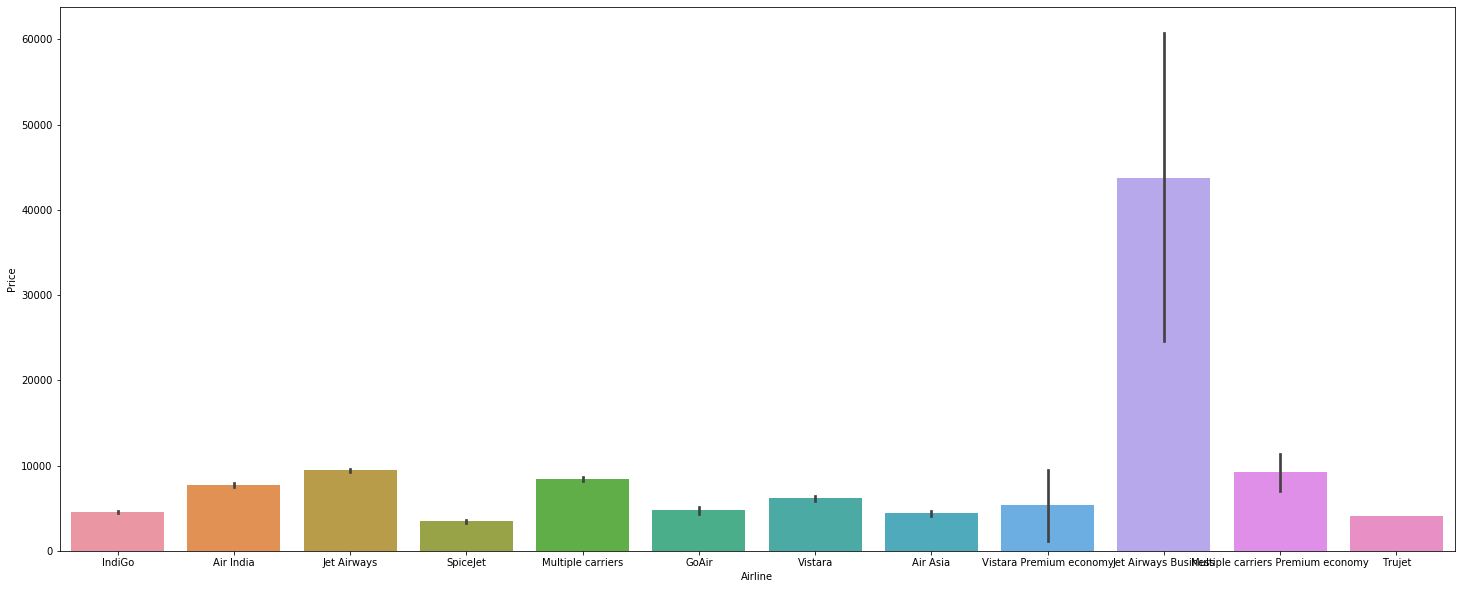

In [16]:
plt.figure(figsize=(25,10))
sns.barplot(x="Airline",y="Price",data=df)
plt.show()

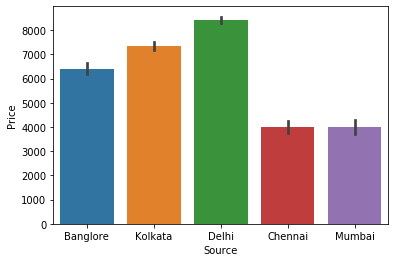

In [17]:
sns.barplot(x="Source",y="Price",data=df)
plt.show()

In [18]:
#Additional_Info Column
df['Additional_Info'].value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
2 Long layover                      1
1 Short layover                     1
Red-eye flight                      1
Name: Additional_Info, dtype: int64

In [19]:
df['Additional_Info'].replace(['No Info'],['No info'],inplace=True)

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Additional_Info']=le.fit_transform(df['Additional_Info'])

In [21]:
#Airline Column
df['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [22]:
df['Airline']=le.fit_transform(df['Airline'])

In [23]:
#Extracting Data From Date and Time

In [24]:
#From Date_of_Journey

In [25]:
df['Date_of_journey']=df['Date_of_Journey'].str.split('/').str[0]

In [26]:
df['Month_of_journey']=df['Date_of_Journey'].str.split('/').str[1]

In [27]:
df['Year_of_journey']=df['Date_of_Journey'].str.split('/').str[2]

In [28]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [29]:
#From Arrival_Time

In [30]:
df['Arrival_Time']=df['Arrival_Time'].str.split(' ').str[0]

In [31]:
df['Arrival_Hour']=df['Arrival_Time'].str.split(':').str[0]

In [32]:
df['Arrival_Minute']=df['Arrival_Time'].str.split(':').str[1]

In [33]:
df.drop(['Arrival_Time'],axis=1,inplace=True)

In [34]:
#From Dep_Time

In [35]:
df['Dep_Hour']=df['Dep_Time'].str.split(':').str[0]

In [36]:
df['Dep_Minute']=df['Dep_Time'].str.split(':').str[1]

In [37]:
df.drop(['Dep_Time'],axis=1,inplace=True)

In [38]:
#From Duration

In [39]:
df['Duration_hour']=df['Duration'].str.split('h').str[0]

In [40]:
df['Duration_hour'].value_counts()

2     2967
1      785
3      627
5      608
7      600
9      551
12     538
8      531
13     516
11     467
10     459
6      442
14     424
15     339
23     331
26     292
16     286
4      278
22     273
24     240
21     237
25     231
27     222
20     203
18     179
19     168
17     161
28     116
29      76
30      61
38      41
37      22
33      21
32      12
36      11
35      10
34       9
31       8
39       3
47       2
5m       2
42       2
40       2
41       1
Name: Duration_hour, dtype: int64

In [41]:
def change(data):
    if data=='5m':
        x='0'
    else:
        x=data
    return x

df['Duration_hour']=df['Duration_hour'].apply(lambda x:change(x))

In [42]:
df['Duration']=df['Duration'].str.split(' ').str[1]


In [43]:
df['Duration_minute']=df['Duration'].str.split('m').str[0]

In [44]:
df['Duration_minute'].fillna('0',inplace=True)

In [45]:
df.drop(['Duration'],axis=1,inplace=True)

In [46]:
df['Date_of_journey']=df['Date_of_journey'].astype(int)
df['Month_of_journey']=df['Month_of_journey'].astype(int)
df['Year_of_journey']=df['Year_of_journey'].astype(int)
df['Arrival_Hour']=df['Arrival_Hour'].astype(int)
df['Arrival_Minute']=df['Arrival_Minute'].astype(int)
df['Dep_Hour']=df['Dep_Hour'].astype(int)
df['Dep_Minute']=df['Dep_Minute'].astype(int)
df['Duration_hour']=df['Duration_hour'].astype(int)
df['Duration_minute']=df['Duration_minute'].astype(int)

In [47]:
#Extracting Data From Route

In [48]:
df['Route'].value_counts()

DEL → BOM → COK                      3000
BLR → DEL                            1941
CCU → BOM → BLR                      1232
CCU → BLR                             896
BOM → HYD                             785
CCU → DEL → BLR                       689
BLR → BOM → DEL                       509
MAA → CCU                             456
DEL → HYD → COK                       411
DEL → JAI → BOM → COK                 314
DEL → BLR → COK                       287
DEL → COK                             262
DEL → AMD → BOM → COK                 246
DEL → MAA → COK                       190
DEL → IDR → BOM → COK                 117
DEL → HYD → MAA → COK                 100
DEL → NAG → BOM → COK                  83
CCU → HYD → BLR                        80
CCU → MAA → BLR                        78
DEL → GOI → BOM → COK                  73
DEL → HYD → BOM → COK                  68
CCU → BBI → BLR                        60
DEL → CCU → BOM → COK                  59
DEL → BHO → BOM → COK             

In [49]:
df['Route_1']=df['Route'].str.split('→ ').str[0]

In [50]:
df['Route_2']=df['Route'].str.split('→ ').str[1]

In [51]:
df['Route_3']=df['Route'].str.split('→ ').str[2]

In [52]:
df['Route_4']=df['Route'].str.split('→ ').str[3]

In [53]:
df['Route_5']=df['Route'].str.split('→ ').str[4]


In [54]:
df['Route_6']=df['Route'].str.split('→ ').str[5]

In [55]:
df.drop(['Route'],axis=1,inplace=True)

In [56]:
df['Route_1'].fillna('None',inplace=True)
df['Route_2'].fillna('None',inplace=True)
df['Route_3'].fillna('None',inplace=True)
df['Route_4'].fillna('None',inplace=True)
df['Route_5'].fillna('None',inplace=True)
df['Route_6'].fillna('None',inplace=True)

In [57]:
df['Route_1']=le.fit_transform(df['Route_1'])
df['Route_2']=le.fit_transform(df['Route_2'])
df['Route_3']=le.fit_transform(df['Route_3'])
df['Route_4']=le.fit_transform(df['Route_4'])
df['Route_5']=le.fit_transform(df['Route_5'])
df['Route_6']=le.fit_transform(df['Route_6'])

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 22 columns):
Additional_Info     13354 non-null int32
Airline             13354 non-null int32
Data                13354 non-null object
Destination         13354 non-null object
Price               13354 non-null int64
Source              13354 non-null object
Total_Stops         13353 non-null object
Date_of_journey     13354 non-null int32
Month_of_journey    13354 non-null int32
Year_of_journey     13354 non-null int32
Arrival_Hour        13354 non-null int32
Arrival_Minute      13354 non-null int32
Dep_Hour            13354 non-null int32
Dep_Minute          13354 non-null int32
Duration_hour       13354 non-null int32
Duration_minute     13354 non-null int32
Route_1             13354 non-null int32
Route_2             13354 non-null int32
Route_3             13354 non-null int32
Route_4             13354 non-null int32
Route_5             13354 non-null int32
Route_6             13354 n

In [59]:
#Destination Column
df['Destination'].value_counts()

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

In [60]:
df['Destination']=le.fit_transform(df['Destination'])

In [61]:
#Source Column
df['Source'].value_counts()

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

In [62]:
df['Source']=le.fit_transform(df['Source'])

In [63]:
#Total_Stops Column
df['Total_Stops'].value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [64]:
df['Total_Stops'].replace(['non-stop'],['0 stop'],inplace=True)

In [65]:
df['Total_Stops'].value_counts()

1 stop     7056
0 stop     4340
2 stops    1899
3 stops      56
4 stops       2
Name: Total_Stops, dtype: int64

In [66]:
df['Stops']=df['Total_Stops'].str.split(' ').str[0]

In [67]:
df['Stops'].isnull().sum()

1

In [68]:
df['Stops'].fillna('0',inplace=True)

In [69]:
df['Stops']=df['Stops'].astype(int)

In [70]:
df.drop(['Total_Stops'],axis=1,inplace=True)

In [71]:
Trainfinal=df.loc[df['Data']=='Train']
Trainfinal.drop(['Data'],axis=1,inplace=True)
Trainfinal.head()

,Additional_Info,Airline,Destination,Price,Source,Date_of_journey,Month_of_journey,Year_of_journey,Arrival_Hour,Arrival_Minute,...,Dep_Minute,Duration_hour,Duration_minute,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,Stops
0,7,3,5,3897,0,24,3,2019,1,10,...,20,2,50,0,13,24,12,4,1,0
1,7,1,0,7662,3,1,5,2019,13,15,...,50,7,25,2,25,1,3,4,1,2
2,7,4,1,13882,2,9,6,2019,4,25,...,25,19,0,3,32,4,5,4,1,2
3,7,3,0,6218,3,12,5,2019,23,30,...,5,5,25,2,34,3,12,4,1,1
4,7,3,5,13302,0,1,3,2019,21,35,...,50,4,45,0,34,8,12,4,1,1


In [72]:
Trainfinal.shape

(10683, 21)

In [73]:
Testfinal=df.loc[df['Data']=='Test']
Testfinal.drop(['Data','Price'],axis=1,inplace=True)
Testfinal.head()

,Additional_Info,Airline,Destination,Source,Date_of_journey,Month_of_journey,Year_of_journey,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_hour,Duration_minute,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,Stops
0,7,4,1,2,6,6,2019,4,25,17,30,10,55,3,7,6,12,4,1,1
1,7,3,0,3,12,5,2019,10,20,6,20,4,0,2,33,3,12,4,1,1
2,5,4,1,2,21,5,2019,19,0,19,15,23,45,3,7,6,12,4,1,1
3,7,6,1,2,21,5,2019,21,0,8,0,13,0,3,7,6,12,4,1,1
4,7,0,2,0,24,6,2019,2,45,23,55,2,50,0,13,24,12,4,1,0


In [74]:
Testfinal.shape

(2671, 20)

In [75]:
#separating independent and dependent variables
df_x=Trainfinal.drop(['Price'],axis=True)
y=Trainfinal['Price']

In [76]:
#Scaling the data using StandardScaler
sc=StandardScaler()
sc.fit(df_x)
df_x=sc.transform(df_x)

In [77]:
x_train,x_test,y_train,y_test=train_test_split(df_x,y,test_size=0.25,random_state=42)

In [78]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(8012, 20) (2671, 20)
(8012,) (2671,)


In [79]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
EN=ElasticNet()
KNR=KNeighborsRegressor()
DTR=DecisionTreeRegressor(random_state=42)
ABR=AdaBoostRegressor(random_state=42)
RFR=RandomForestRegressor(random_state=42)
GBR=GradientBoostingRegressor(random_state=42)
XGR=XGBRegressor(random_state=42)

In [80]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('XGBRegressor',XGR))

In [81]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
MAE=[]
for name,model in models:
    print('*********************************',name,'*********************************')
    print('\n',model)
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pre)
    print("Mean_Squared_Error =",mse)
    MSE.append(round(mse,3))
    mae=mean_absolute_error(y_test,pre)
    print("Mean_Absolute_Error =",mae)
    MAE.append(round(mae,3))
    score= cross_val_score(model,df_x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(round(score,3))
    print('\n')

********************************* LinearRegression *********************************

 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  0.502487319763945
Mean_Squared_Error = 10162878.05734045
Mean_Absolute_Error = 2279.792306288136
Cross_Val_Score =  -2187470442734210.8


********************************* Lasso *********************************

 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  0.5024840625788283
Mean_Squared_Error = 10162944.593082082
Mean_Absolute_Error = 2279.629961664122
Cross_Val_Score =  0.4987167765849171


********************************* Ridge *********************************

 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
R2_score =  0.5024857135260177
Mean_Squared_Error 

In [82]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Mean_Absolute_Error':MAE,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Mean_Absolute_Error,Cross_val_score
0,LinearRegression,0.502487,1.016288e+07,2279.792,-2.187470e+15
1,Lasso,0.502484,1.016294e+07,2279.630,4.990000e-01
2,Ridge,0.502486,1.016291e+07,2279.782,4.990000e-01
3,ElasticNet,0.468161,1.086407e+07,2358.590,4.640000e-01
4,DecisionTreeRegressor,0.789699,4.295893e+06,706.551,8.190000e-01
5,KNeighborsRegressor,0.802367,4.037130e+06,1128.540,7.800000e-01
6,AdaBoostRegressor,0.255199,1.521433e+07,3283.997,2.590000e-01
7,RandomForestRegressor,0.861306,2.833160e+06,684.376,8.830000e-01
8,GradientBoostingRegressor,0.836491,3.340059e+06,1245.855,8.320000e-01
9,XGBRegressor,0.896587,2.112460e+06,727.129,9.100000e-01


From the above table we can easily identify that our model is performing the best in XGB Regression algorithm.

In [83]:
#Lets use GridsearchCV for hyperparamenter tuning for XGBRegressor
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.25)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [84]:
pipeline=Pipeline([("ss",StandardScaler()),("XGR",XGBRegressor())])
parameters = {"XGR__n_estimators":[10,100,200,300,400,500]}
clf = GridSearchCV(pipeline, parameters, cv=5,scoring="r2")
clf.fit(df_x,y)
clf.best_params_

{'XGR__n_estimators': 200}

In [85]:
pipeline_XGR=Pipeline([("ss",StandardScaler()),("XGR",XGBRegressor(n_esttimators=200))])
maxr2_score(pipeline_XGR,df_x,y)

max r2 score corresponding to  51  is  0.9263795346323646


51

We can observe that r2 score has been increased after applying the GridsearchCV from 0.89 to 0.92
So, We canchoose XGB Regression algorithm as MSE is very less, MAE is also less and good R2 score. 
Hence XGB Regressor algorithm performs the best.
R2 Score=0.896587			
MSE=2.112460e+06
MAE=727.129
Cross Validation Score=9.100000e-01

In [86]:
from sklearn.externals import joblib
joblib.dump(XGR,'Flight_Ticket_Price_XGR.pkl')

['Flight_Ticket_Price_XGR.pkl']